In [6]:
import pandas as pd

# Load the dataset and skip malformed rows
df = pd.read_csv('Covid-data.csv', on_bad_lines='skip')

df.columns        # Lists all column names
#df.info()         # Gives structure + non-null counts



Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
# Check for missing values
df.isnull().sum()


iso_code                                       0
continent                                   3358
location                                       0
date                                           0
total_cases                                   14
                                           ...  
population                                     1
excess_mortality_cumulative_absolute       56496
excess_mortality_cumulative                56496
excess_mortality                           56496
excess_mortality_cumulative_per_million    56496
Length: 67, dtype: int64

In [8]:
df.head()         # Shows the first 5 rows


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [45]:
#


In [9]:
# Filter countries of interest
countries = ['American Samoa ', 'Angola', 'Afghanistan']
df = df[df['location'].isin(countries)]

df = df.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Convert date column
df['date'] = pd.to_datetime(df['date'])




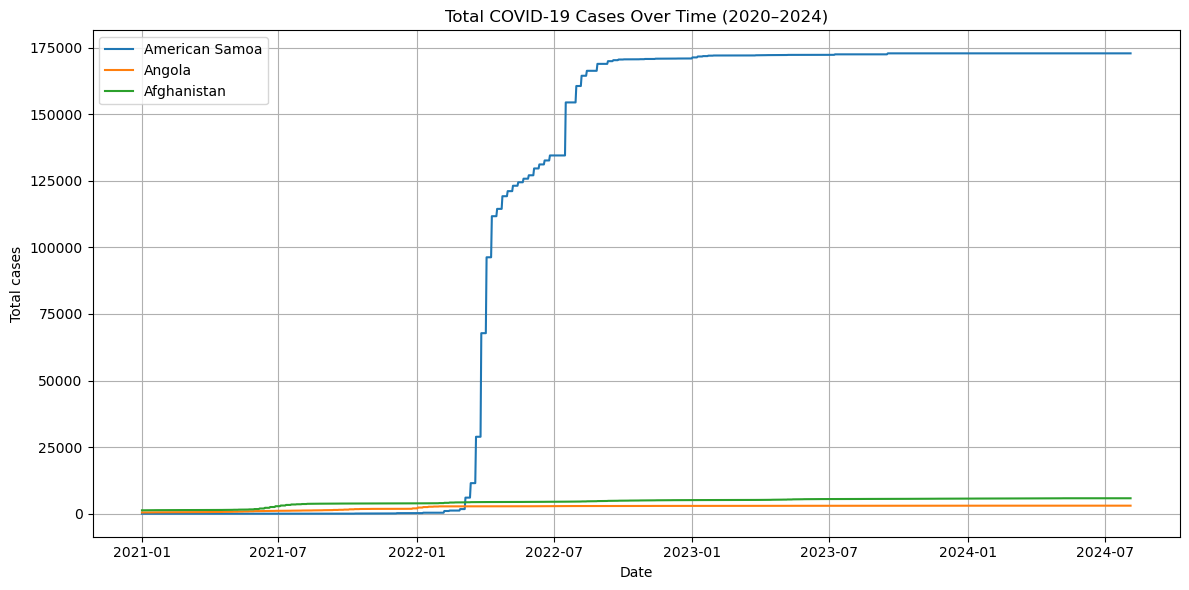

In [23]:
# Fill missing numeric values using forward fill
import pandas as pd
import matplotlib.pyplot as plt

# Filter for countries and date range (2021–2024)
countries = ['American Samoa', 'Angola', 'Afghanistan']
df = df[(df['location'].isin(countries)) & (df['date'].dt.year >= 2021) & (df['date'].dt.year <= 2024)]

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases_per_million'], label=country)

plt.legend()
plt.title('Total COVID-19 Cases Over Time (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# American Samoa has more cases over time compared to Angola


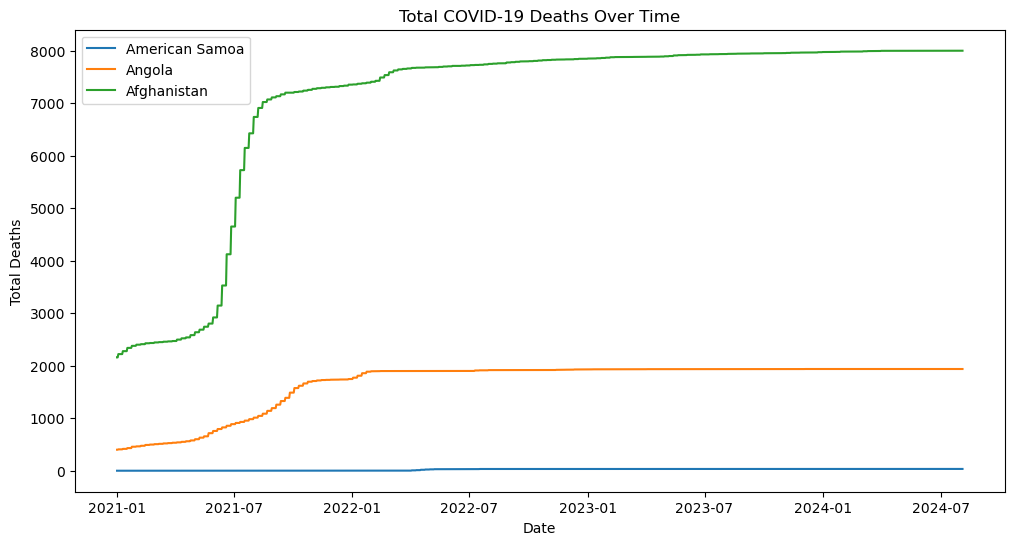

In [24]:
# Plot total deaths over time
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.legend()
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.show()



In [ ]:
# Afghanistan has more deaths over time compared to Angola

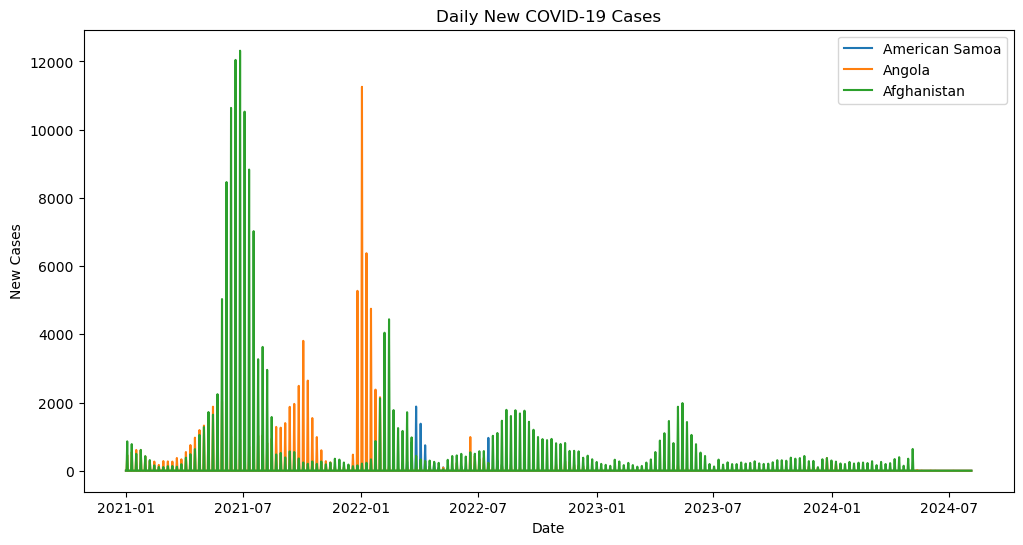

In [25]:
# Compare daily new cases
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.legend()
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


In [ ]:
# Angola had more new infections between end of 2021 to beginning of 2022

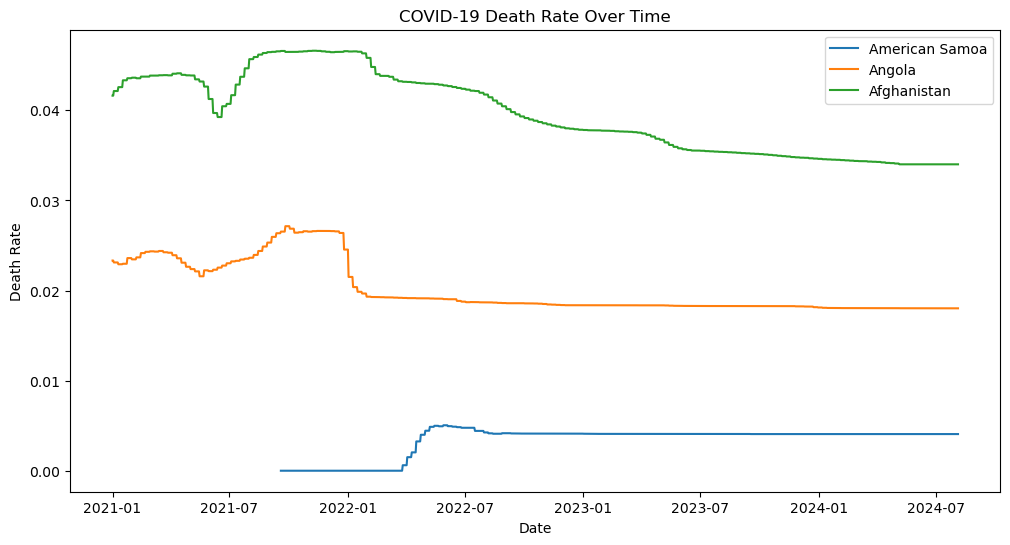

In [26]:
# Death rate = total_deaths / total_cases
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot death rate
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.legend()
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.show()


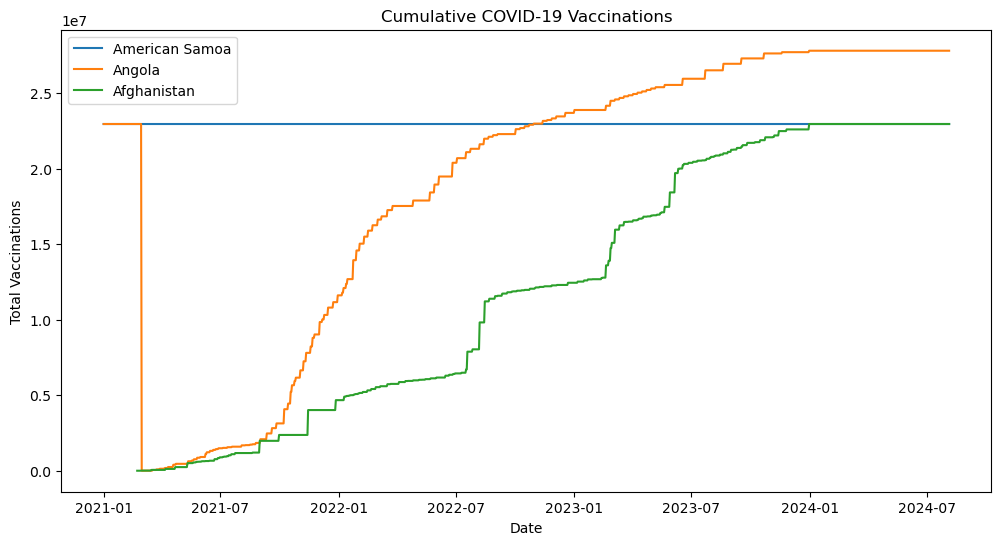

In [27]:
# Plot cumulative vaccinations
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.legend()
plt.title('Cumulative COVID-19 Vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and clean it
df = pd.read_csv('Covid-data.csv', on_bad_lines='skip')
df.columns = df.columns.str.strip()  # Remove extra spaces just in case
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Filter for selected countries and recent years
countries = ['American Samoa', 'Angola', 'Afghanistan']
df = df[df['location'].isin(countries)]
df = df[df['date'].dt.year >= 2020]

# Fill missing vaccination data forward
df['total_vaccinations'] = df['total_vaccinations'].fillna(method='ffill')


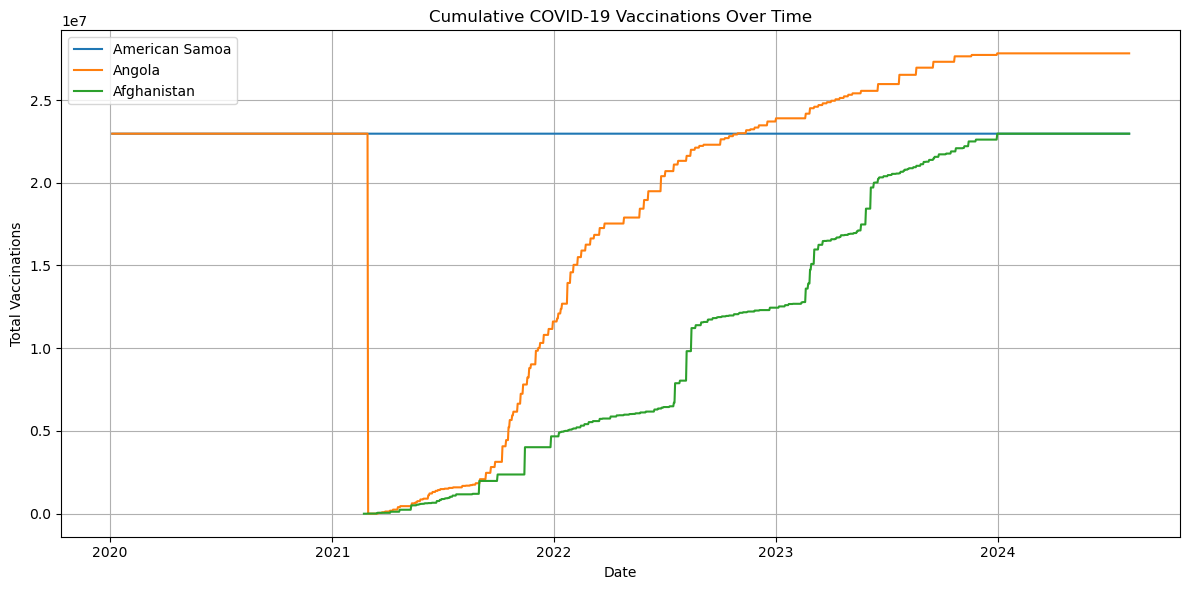

In [18]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


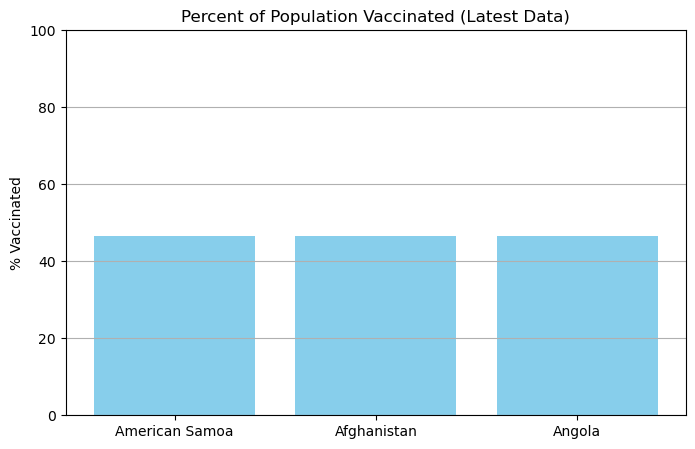

In [28]:
# Get the latest vaccination % for each country
latest = df.sort_values('date').groupby('location').tail(1)
latest = latest[['location', 'people_vaccinated_per_hundred']].dropna()

plt.figure(figsize=(8, 5))
plt.bar(latest['location'], latest['people_vaccinated_per_hundred'], color='skyblue')
plt.title('Percent of Population Vaccinated (Latest Data)')
plt.ylabel('% Vaccinated')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the latest data per country
latest_df = df.sort_values('date').groupby('location').tail(1)

# Select only relevant columns
summary = latest_df[['location', 'total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred']]

# Drop rows with missing data
summary = summary.dropna()

# Optional: Limit to countries of interest
summary = summary[summary['location'].isin(countries)]


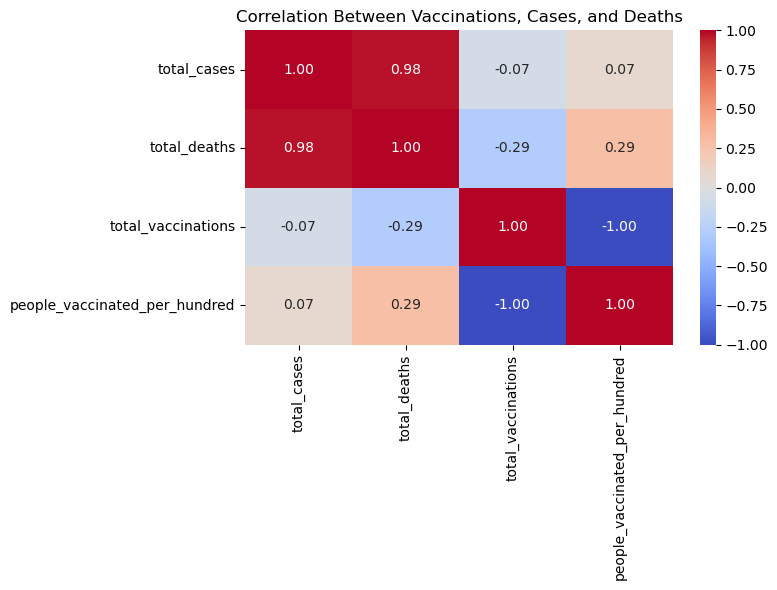

In [34]:
# Compute correlation matrix
corr = summary[['total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Vaccinations, Cases, and Deaths')
plt.tight_layout()
plt.show()



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


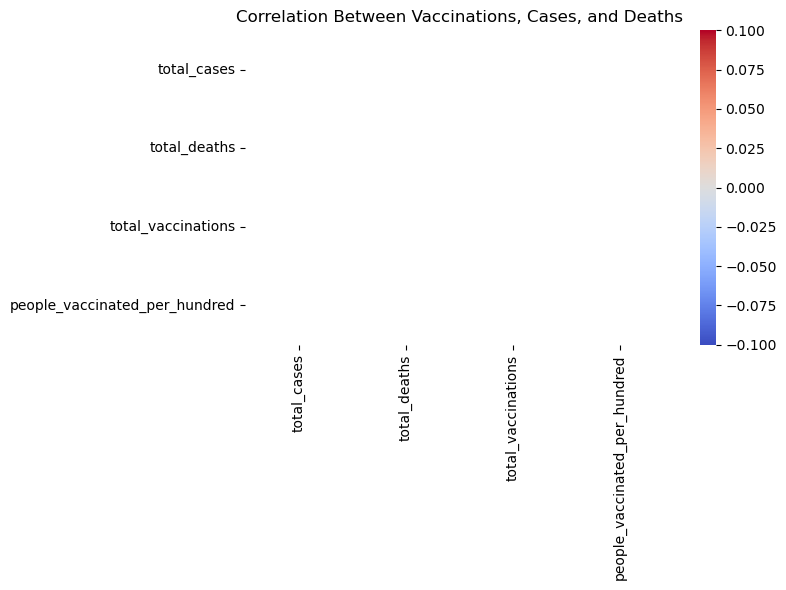

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load fresh dataset and preprocess
df = pd.read_csv('Covid-data.csv', on_bad_lines='skip')
df.columns = df.columns.str.strip()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Filter for your countries
countries = ['American Samoa', 'Angola', 'Afghanistan']
df = df[df['location'].isin(countries)]

# Get the latest data per country
latest_df = df.sort_values('date').groupby('location').tail(1)

# Select only numeric columns you want
summary = latest_df[['total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred']]

# Drop rows with missing or non-numeric values
summary = summary.dropna()
summary = summary.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric

# Compute the correlation matrix
corr_matrix = summary.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Vaccinations, Cases, and Deaths')
plt.tight_layout()
plt.show()
